Name: Aniruddha Ojha Roll No: BEBD22602 Div B

Title : Implementing a 5 qubit Quantum Fourier transform

In [66]:
# working_qft.py
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile
from qiskit.circuit.library import QFTGate
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [68]:
backend = AerSimulator()

In [70]:
# build circuit
q = QuantumRegister(5, 'q')
c = ClassicalRegister(5, 'c')
qc = QuantumCircuit(q, c)

In [72]:
# set initial state |10101>
qc.x(q[4])
qc.x(q[2])
qc.x(q[0])

In [74]:
# append QFT as a Gate object (QFTGate is the newer API)
qc.append(QFTGate(5), q)
qc.measure(q, c)

             ┌───┐                                                           »
q_0 -> 0 ────┤ X ├───────────────────────────────────────────────────────────»
             └───┘                                                           »
q_1 -> 1 ──────────────────────────────────────────────■─────────────■───────»
             ┌───┐                                     │       ┌───┐ │       »
q_2 -> 2 ────┤ X ├───────────────────■────────■────────┼───────┤ H ├─┼───────»
             └───┘             ┌───┐ │        │P(π/2)  │       └───┘ │P(π/4) »
q_3 -> 3 ──────────────■───────┤ H ├─┼────────■────────┼─────────────■───────»
         ┌───────────┐ │P(π/2) └───┘ │P(π/4)           │P(π/8)               »
q_4 -> 4 ┤ U2(-π,-π) ├─■─────────────■─────────────────■─────────────────────»
         └───────────┘                                                       »
    c: 5/════════════════════════════════════════════════════════════════════»
                                                    

C:\Users\Aadesh\AppData\Local\Temp\ipykernel_6512\1362258010.py:10: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  plot_histogram(counts).show()


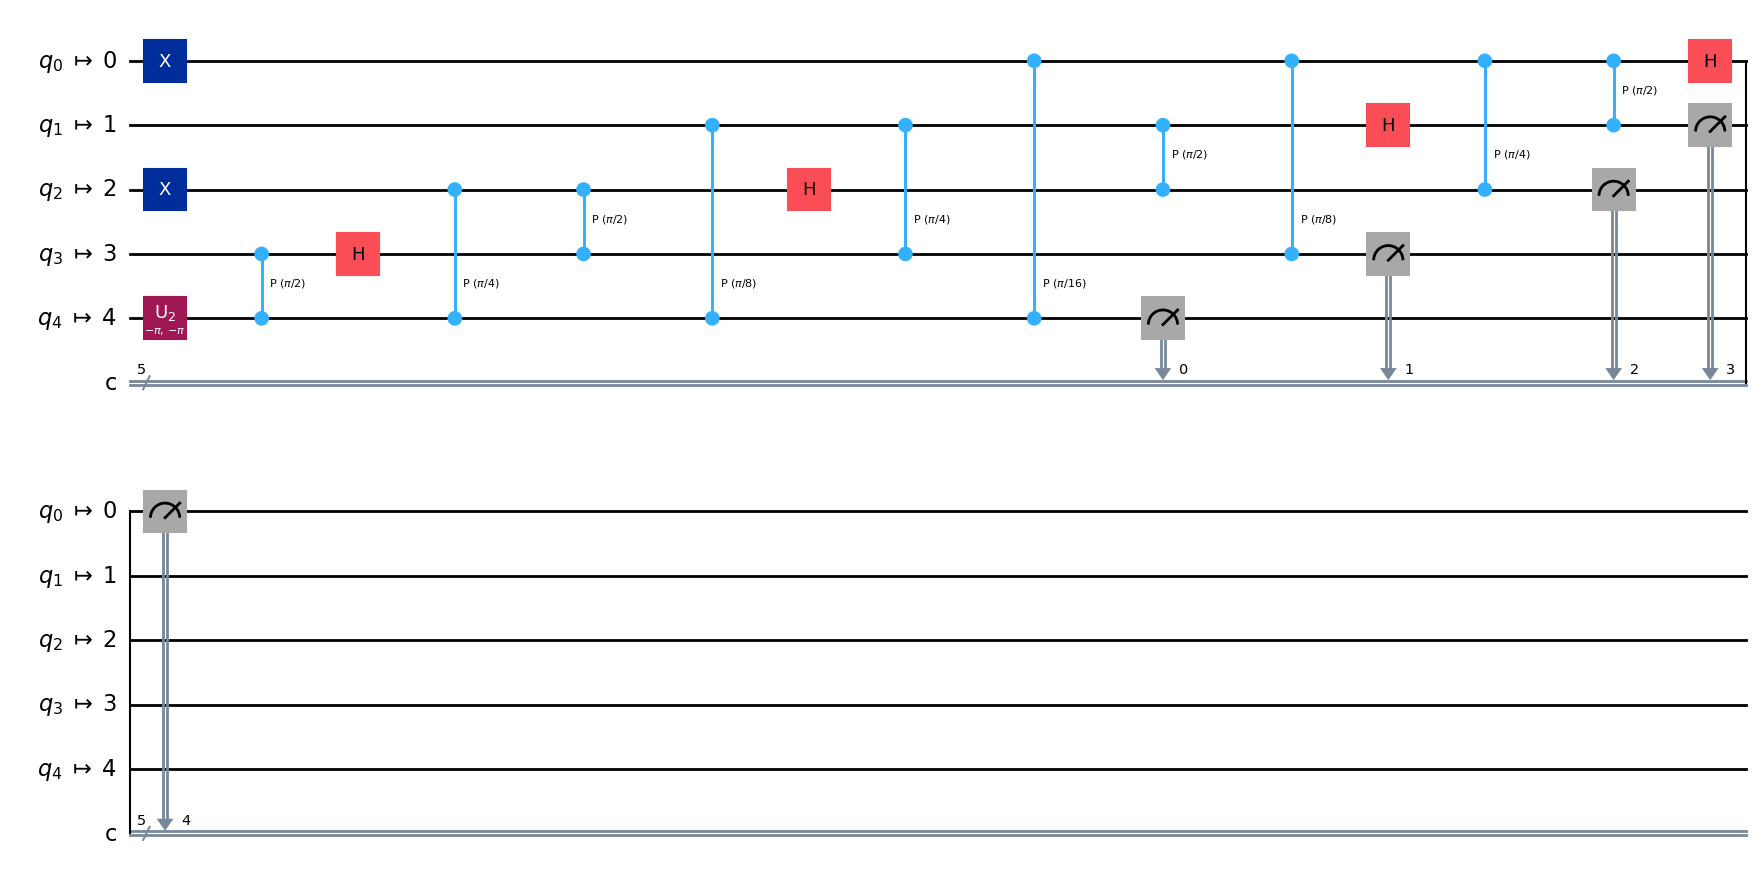

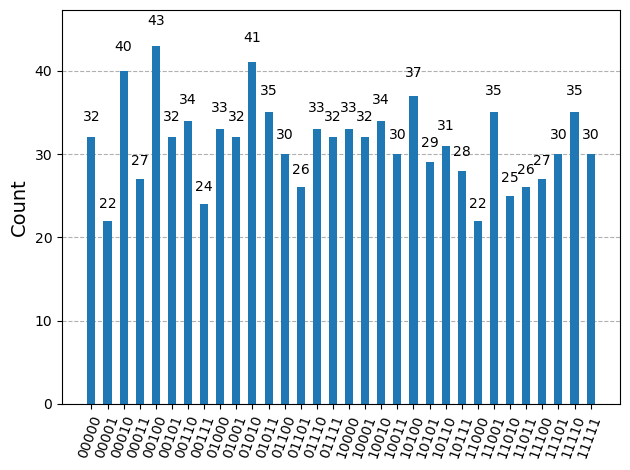

In [84]:
# IMPORTANT: transpile so composite gates are converted to Aer-basis gates
qc_t = transpile(qc, backend)
print(qc_t)
qc_t.draw('mpl', filename='qft_decomposed.png')
# run
job = backend.run(qc_t, shots=1000)
result = job.result()
counts = result.get_counts()
print("Counts:", counts)
plot_histogram(counts).show()